In [215]:
import pandas as pd
import numpy as np
 
np.random.seed(10)
rows = 150  
 
data = {
    "Student_ID": range(1, rows + 1),
    "Age": np.random.randint(16, 30, rows),
    "Gender": np.random.choice(["Male", "Female", "Other"], rows),
    "Study_Hours": np.random.normal(6, 2, rows),
    "Attendance": np.random.randint(40, 110, rows),
    "Marks": np.random.randint(25, 100, rows),
    "Backlogs": np.random.randint(0, 5, rows),
    "CGPA": np.round(np.random.normal(7.2, 1.5, rows), 2)
}
 
df = pd.DataFrame(data)

df_2 = pd.DataFrame(data)

 
# -------- ADD MISSING VALUES ----------
df.loc[np.random.choice(df.index, 12), "Study_Hours"] = np.nan
df.loc[np.random.choice(df.index, 10), "CGPA"] = np.nan
df.loc[np.random.choice(df.index, 8), "Age"] = np.nan
df.loc[np.random.choice(df.index, 6), "Gender"] = np.nan
 
# -------- ADD EXTREME / INVALID VALUES ----------
df.loc[5, "Attendance"] = 100
df.loc[8, "Attendance"] = 10
 
df.loc[12, "Marks"] = 200
df.loc[20, "Marks"] = 250
df.loc[25, "Marks"] = 10
 
df.loc[30, "CGPA"] = 10
df.loc[35, "CGPA"] = 0
 
df.loc[40, "Study_Hours"] = 10
df.loc[45, "Study_Hours"] = 0
 
df.loc[50, "Backlogs"] = 0
df.loc[55, "Backlogs"] = 10
 
# Save dataset
df.to_csv("students_dataset.csv", index=False)
 
print("Dataset created with missing values, inconsistencies & outliers!")

Dataset created with missing values, inconsistencies & outliers!


In [216]:
df = pd.read_csv('students_dataset.csv')

In [217]:
df.head(10)

,Student_ID,Age,Gender,Study_Hours,Attendance,Marks,Backlogs,CGPA
0,1,25.0,Other,4.194497,94,43,2,6.78
1,2,NaN,Other,2.577449,48,29,0,6.59
2,3,20.0,Other,7.665052,50,88,4,6.44
3,4,16.0,Male,7.658504,97,37,4,9.07
4,5,17.0,Other,2.961550,44,83,1,8.98
5,6,27.0,Other,3.208670,100,99,3,8.26
6,7,28.0,Other,6.939310,47,40,2,6.38
7,8,25.0,Other,7.241376,83,56,1,8.13
8,9,29.0,Other,7.011855,10,87,2,8.00
9,10,16.0,Female,4.669403,82,67,2,7.73


In [218]:
df.Gender.value_counts()

Gender
Other     49
Female    49
Male      46
Name: count, dtype: int64

In [219]:
df.isnull().sum()

Student_ID      0
Age             8
Gender          6
Study_Hours    11
Attendance      0
Marks           0
Backlogs        0
CGPA            9
dtype: int64

In [220]:
# Step 1: Standardize 'gender' values
df['Gender'] = df['Gender'].str.strip().str.capitalize()  # removes spaces and capitalizes first letter

# Optional: Make sure only allowed categories exist
allowed_genders = ['Male', 'Female', 'Other']
df['Gender'] = df['Gender'].apply(lambda x: x if x in allowed_genders else None)

# Step 2: Fill missing values with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [221]:
df.replace([0,1,2],['Male','Female','Other'])


,Student_ID,Age,Gender,Study_Hours,Attendance,Marks,Backlogs,CGPA
0,Female,25.0,Other,4.194497,94,43,Other,6.78
1,Other,NaN,Other,2.577449,48,29,Male,6.59
2,3,20.0,Other,7.665052,50,88,4,6.44
3,4,16.0,Male,7.658504,97,37,4,9.07
4,5,17.0,Other,2.96155,44,83,Female,8.98
...,...,...,...,...,...,...,...,...
145,146,21.0,Female,7.070841,75,98,Male,10.78
146,147,25.0,Female,5.325864,109,26,4,9.86
147,148,16.0,Male,4.721947,97,39,Female,7.86
148,149,20.0,Male,6.774327,75,39,Male,5.7


In [222]:
print(df)

     Student_ID   Age  Gender  Study_Hours  Attendance  Marks  Backlogs   CGPA
0             1  25.0   Other     4.194497          94     43         2   6.78
1             2   NaN   Other     2.577449          48     29         0   6.59
2             3  20.0   Other     7.665052          50     88         4   6.44
3             4  16.0    Male     7.658504          97     37         4   9.07
4             5  17.0   Other     2.961550          44     83         1   8.98
..          ...   ...     ...          ...         ...    ...       ...    ...
145         146  21.0  Female     7.070841          75     98         0  10.78
146         147  25.0  Female     5.325864         109     26         4   9.86
147         148  16.0    Male     4.721947          97     39         1   7.86
148         149  20.0    Male     6.774327          75     39         0   5.70
149         150   NaN  Female     4.284532         106     33         1   9.79

[150 rows x 8 columns]


In [223]:
df.isnull().sum()

Student_ID      0
Age             8
Gender          0
Study_Hours    11
Attendance      0
Marks           0
Backlogs        0
CGPA            9
dtype: int64

In [224]:
import pandas as pd

numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [225]:
df

,Student_ID,Age,Gender,Study_Hours,Attendance,Marks,Backlogs,CGPA
0,1,25.0,Other,4.194497,94,43,2,6.78
1,2,23.0,Other,2.577449,48,29,0,6.59
2,3,20.0,Other,7.665052,50,88,4,6.44
3,4,16.0,Male,7.658504,97,37,4,9.07
4,5,17.0,Other,2.961550,44,83,1,8.98
...,...,...,...,...,...,...,...,...
145,146,21.0,Female,7.070841,75,98,0,10.78
146,147,25.0,Female,5.325864,109,26,4,9.86
147,148,16.0,Male,4.721947,97,39,1,7.86
148,149,20.0,Male,6.774327,75,39,0,5.70


In [226]:
df.isnull().sum()

Student_ID     0
Age            0
Gender         0
Study_Hours    0
Attendance     0
Marks          0
Backlogs       0
CGPA           0
dtype: int64

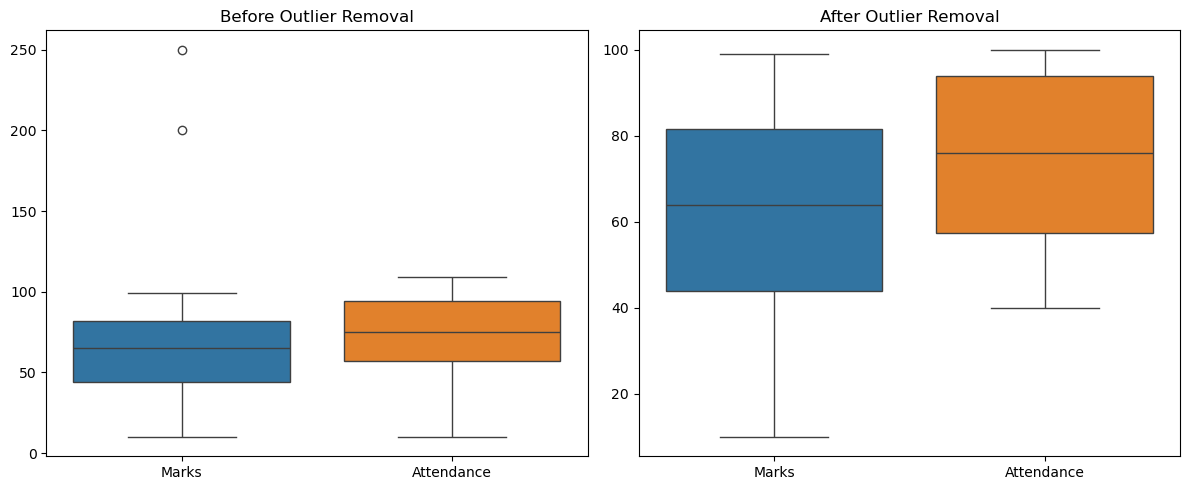

Attendance min/max: 40 100
Marks min/max: 10 99


In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

cols = ['Marks', 'Attendance']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df[cols])
plt.title("Before Outlier Removal")

z_scores = np.abs(stats.zscore(df[cols]))

outlier_rows = (z_scores > 3).any(axis=1)

df_cleaned = df[~outlier_rows].reset_index(drop=True)

df_cleaned['Attendance'] = df_cleaned['Attendance'].clip(lower=0, upper=100)
df_cleaned['Marks'] = df_cleaned['Marks'].clip(lower=0, upper=100)
df_cleaned['CGPA'] = df_cleaned['CGPA'].clip(lower=0, upper=10)

plt.subplot(1,2,2)
sns.boxplot(data=df_cleaned[cols])
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

print("Attendance min/max:", df_cleaned['Attendance'].min(), df_cleaned['Attendance'].max())
print("Marks min/max:", df_cleaned['Marks'].min(), df_cleaned['Marks'].max())


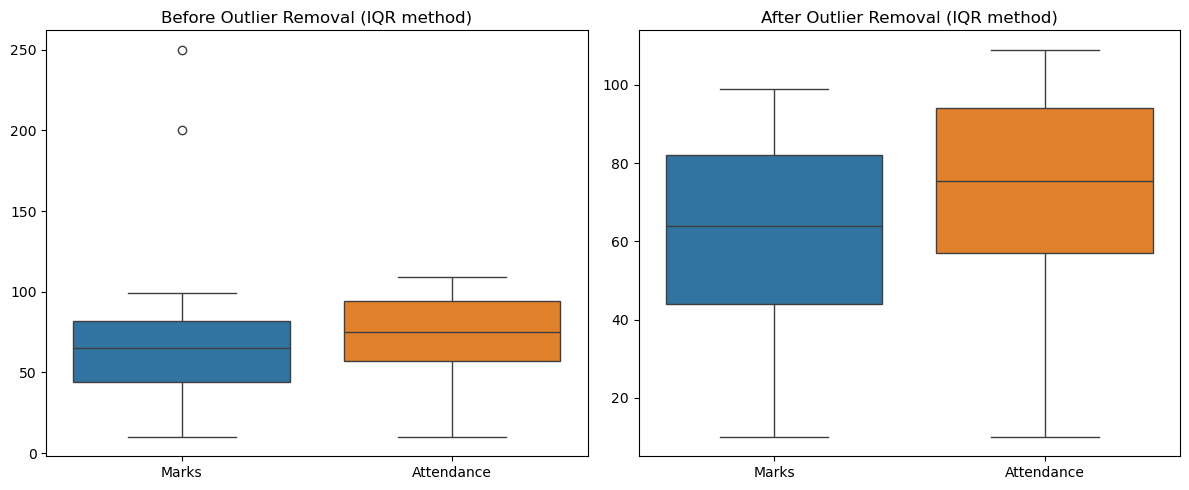

Rows before cleaning: 150
Rows after IQR outlier removal: 148


In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Marks', 'Attendance']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df[cols])
plt.title("Before Outlier Removal (IQR method)")

df_iqr_cleaned = df.copy()

for col in cols:
    Q1 = df_iqr_cleaned[col].quantile(0.25)
    Q3 = df_iqr_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_iqr_cleaned = df_iqr_cleaned[(df_iqr_cleaned[col] >= lower_bound) & (df_iqr_cleaned[col] <= upper_bound)]

plt.subplot(1,2,2)
sns.boxplot(data=df_iqr_cleaned[cols])
plt.title("After Outlier Removal (IQR method)")

plt.tight_layout()
plt.show()

print("Rows before cleaning:", df.shape[0])
print("Rows after IQR outlier removal:", df_iqr_cleaned.shape[0])

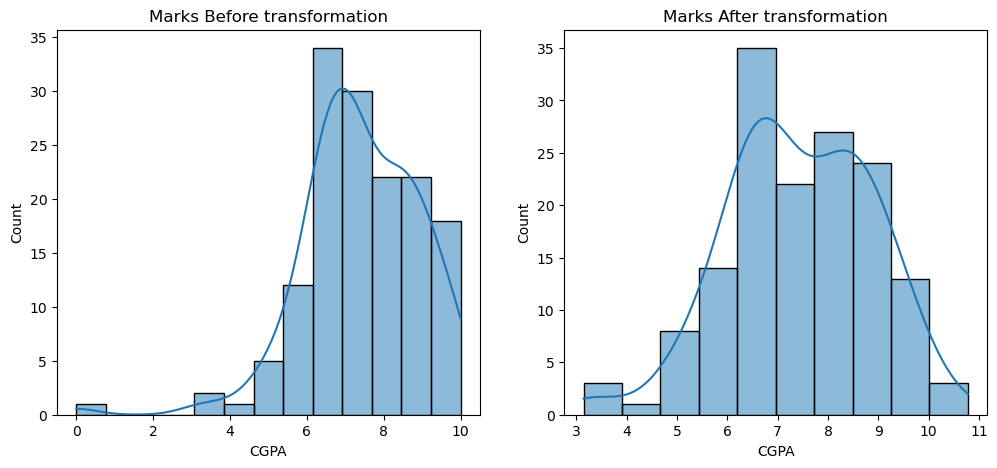

In [264]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_cleaned['CGPA'],kde=True)
plt.title("Marks Before transformation")

plt.subplot (1,2,2)
sns.histplot(df_2['CGPA'],kde=True)
plt.title("Marks After transformation")

plt.show()

In [229]:
df_cleaned.head(5)

,Student_ID,Age,Gender,Study_Hours,Attendance,Marks,Backlogs,CGPA
0,1,25.0,Other,4.194497,94,43,2,6.78
1,2,23.0,Other,2.577449,48,29,0,6.59
2,3,20.0,Other,7.665052,50,88,4,6.44
3,4,16.0,Male,7.658504,97,37,4,9.07
4,5,17.0,Other,2.961550,44,83,1,8.98
